In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df = pd.read_csv("../Reyhan/chikungunya.csv")
df.head()

,sex,fever,cold,joint pains,myalgia,headache,fatigue,vomitting,arthritis,Conjuctivitis,Nausea,Maculopapular rash,Eye Pain,Chills,Swelling,Severe Chikungunya
0,male,yes,yes,no,no,no,no,yes,no,no,yes,yes,yes,yes,yes,yes
1,female,yes,yes,yes,no,no,yes,no,yes,no,no,no,no,no,yes,yes
2,male,yes,no,no,yes,yes,yes,no,yes,no,yes,yes,yes,no,yes,no
3,female,no,yes,yes,no,yes,no,yes,yes,yes,yes,yes,no,no,yes,yes
4,male,yes,yes,no,yes,yes,yes,yes,yes,yes,yes,yes,yes,no,no,no


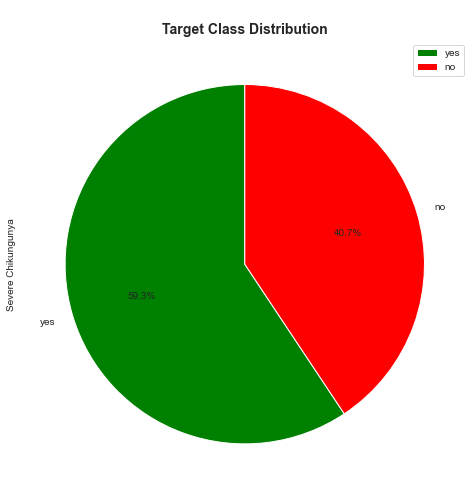

In [7]:
sns.set_style("whitegrid")
plt.figure(figsize=(7,7))
df["Severe Chikungunya"].value_counts().plot(kind="pie",colors=['green','red'],legend=True,labels=["yes","no"],
                               startangle=90,autopct='%1.1f%%')
plt.title('\nTarget Class Distribution',fontweight='bold',fontsize=14)
plt.tight_layout()
plt.show()

In [8]:
df.groupby("sex")["Severe Chikungunya"].value_counts().unstack()

Severe Chikungunya,no,yes
sex,,
female,202,294
male,205,300


In [9]:
df["sex"]=df["sex"].replace({"male":1,"female":0})
for col in df.columns:
    if col not in ["sex"]:
        df[col]=df[col].replace({'yes':1,'no':0})
df

,sex,fever,cold,joint pains,myalgia,headache,fatigue,vomitting,arthritis,Conjuctivitis,Nausea,Maculopapular rash,Eye Pain,Chills,Swelling,Severe Chikungunya
0,1,1,1,0,0,0,0,1,0,0,1,1,1,1,1,1
1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,1
2,1,1,0,0,1,1,1,0,1,0,1,1,1,0,1,0
3,0,0,1,1,0,1,0,1,1,1,1,1,0,0,1,1
4,1,1,1,0,1,1,1,1,1,1,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0,0,0,1,1,1,1,0,1,1,0,0,0,1,0,0
997,0,1,1,0,1,0,0,1,1,0,0,0,1,1,1,1
998,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,1
999,0,1,0,1,0,0,0,1,0,1,0,1,0,1,1,1


In [11]:
x = df.values
x = np.delete(x,15,axis=1)
y = df['Severe Chikungunya'].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=5)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
x = scaler.fit_transform(x)

In [29]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

gnb = GaussianNB()
gnb.fit(x_train, y_train)
pred = gnb.predict(x_test)

In [30]:
nbscore = gnb.score(x_test,y_test)
nbcm = confusion_matrix(y_test,pred)
nbcr = classification_report(y_test,pred)
print('Naïve Bayes')
print('***********')
print('Testscore')
print(nbscore)
print('---------------------')
print('\n')
print('Confusion Matrix')
print(nbcm)
print('---------------------')
print('\n')
print('Classification Report')
print(nbcr) 

Naïve Bayes
***********
Testscore
0.6102719033232629
---------------------


Confusion Matrix
[[ 17 107]
 [ 22 185]]
---------------------


Classification Report
              precision    recall  f1-score   support

           0       0.44      0.14      0.21       124
           1       0.63      0.89      0.74       207

    accuracy                           0.61       331
   macro avg       0.53      0.52      0.48       331
weighted avg       0.56      0.61      0.54       331



In [31]:
import pickle

with open('chiku_model','wb') as r:
    pickle.dump(gnb,r)

In [32]:
with open('chiku_model','rb') as r:
    gnb = pickle.load(r)

In [36]:
y_pred = gnb.predict(x_test)
round(accuracy_score(y_test,y_pred),5)

0.61027